# Proyecto Integral - Procesamiento de Datos con Python
## Aprobación de Tarjetas de Crédito

###Equipo 7:

*   Jorge Iván Ávalos López
*   Eric Gómez Hernández
*   Montserrat Moreno Rebollar
*   Ingrid Pérez López
*   José Hazel Ortiz Celis

# Postwork 1 | Identificación del problema.  

###Aprobación de tarjetas de crédito.

<p align = "justify"> Las Instituciones Financieras están constantemente en búsqueda de la mejor selección de candidatos a los cuales les será otorgada o denegada una tarjeta de crédito. Esto es debido a que la maximización de utilidades y minimización de pérdidas depende de ello, de ahí la importancia de generar un modelo que cumpla adecuadamente con este objetivo, volviéndolo así un negocio rentable.</p>

<p align = "justify"> Una vez identificado este problema surge la pregunta: ¿cómo encontramos el mejor modelo? La respuesta es a través del análisis que tiene base en los datos de clientes anteriores acerca de su comportamiento y características. Las similitudes entre clientes responsables y morosos, y potenciales clientes permiten una clasificación o segmentación de los candidatos y por tanto un mayor control en la toma de decisiones.</p> 

### Investigación respecto al problema
<p align = "justify"> Las soluciones a este tipo de problemas son regularmente obtenidas por algoritmos de clasificación de Machine Learning que toman su base en el historial del comportamiento y de características de clientes ya registrados anteriormente.</p>

<p align = "justify"> Para obtener un buen modelo se debe recurrir a métodos que contemplen dentro de sus algoritmos de clasificación, atributos tanto numéricos como categóricos, para poder producir modelos de predicción más eficientes.</p> 

<p align = "justify"> Se puede realizar una separación por grupos de los elementos a analizar, para poder tener un procesamiento específico dentro de un rango.</p> 

### Búsqueda de soluciones anteriores
<p align = "justify"> Existen una gran diversidad de fuentes de ayuda ya que es un problema común de predicción que conlleva la clasificación multivariante. Se analizan para su solución en materia educativa y cursos de aprendizaje online. Algunos ejemplos son:</p>


*   https://archive.ics.uci.edu/ml/datasets/credit+approval
*   https://www.kaggle.com/rikdifos/credit-card-approval-prediction




#Postwork 2 | Planteamiento de preguntas

<p align = "justify" > Además de desarrollar un modelo de predicción con un conjunto de datos de solicitudes y comportamientos de clientes que pueda mediante la evaluación de riesgo la aprobación de un crédito o no decidir aprobación, podríamos dar información conforme a las dos siguientes categorías:

Mediante un análisis exploratorio de datos (DEA) utilizando técnicas de pre-procesamiento de datos (descriptiva con respecto a datos demográficos):

*   ¿Cuáles son los clientes más responsables en sus pagos?
*   ¿Los clientes con mayor antiguedad suelen tener retrasos en sus pagos?
*   ¿Quienes son los clientes con mayor mora? ¿Son clientes con antiguedad o clientes nuevos?
*   ¿Qué clientes son los más morosos (ej. la cantidad de hijos es factor determinístico)?
*   ¿Cuál es el tiempo mayor de morosidad y que atributos de clientes la determinan?
*   ¿Qué periodos de tiempo son los de mayor y menor solvencia para la liquidez de los créditos?
*   ¿Cuál es el atributo que favorece a la cancelación de un crédito?
*   ¿Cuál es el periodo de tiempo donde hay más cancelaciones?
*   ¿Qué atributos contribuyen más a la antigüedad del cliente (además de la edad)?


Mediante la aplicación de técnicas de machine-learning, por cada tipo de cliente (segmentación):

*   ¿Cuáles son los atributos característicos en la aprobación de una tarjeta de crédito?
*   ¿Cuál es el tiempo estimado para pagar un crédito?
*   ¿Cúal es el ROI?
*   ¿Cuáles son los límites crediticios más adecuados? </p>


#Postwork 3 | Colección de Datos

Kaggle, como plataforma gratuita de datos públicos, nos ofrece un conjunto de datos descargables [credit-card-approval-prediction](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) para explorar y analizar nuestra problemática “decidir emitir o no una tarjeta de crédito” con herramientas de procesamiento de datos en Python.

Los datos, representados mediante dos conjuntos, tienen las siguientes características y estructura de datos:

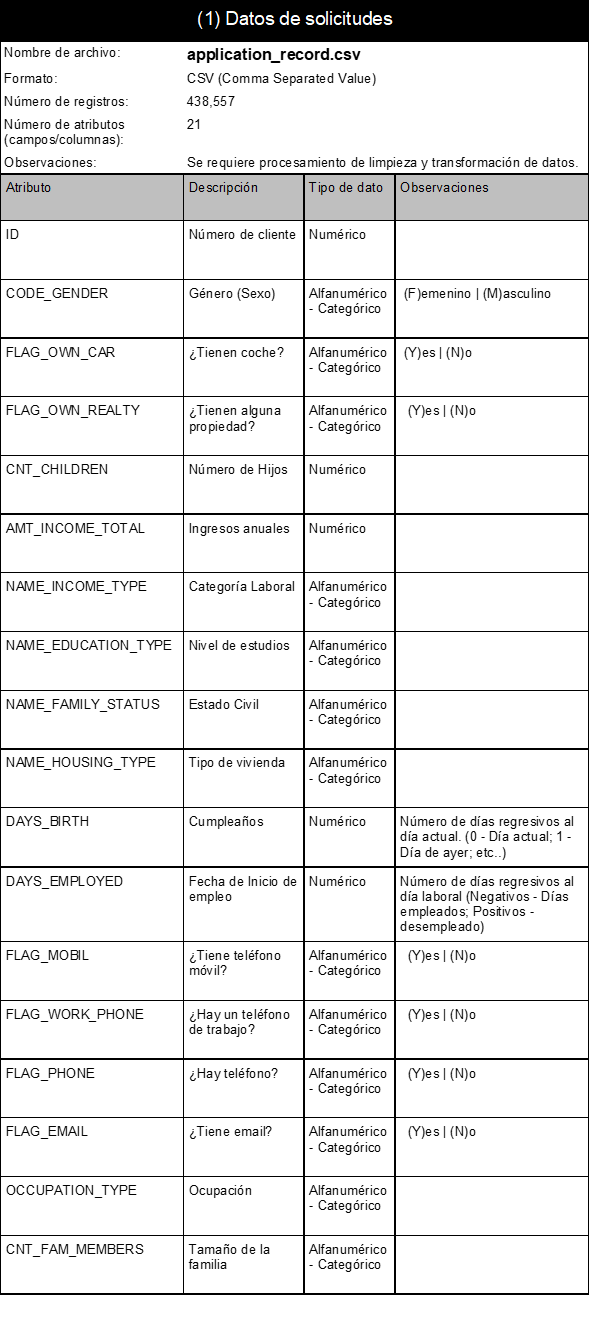

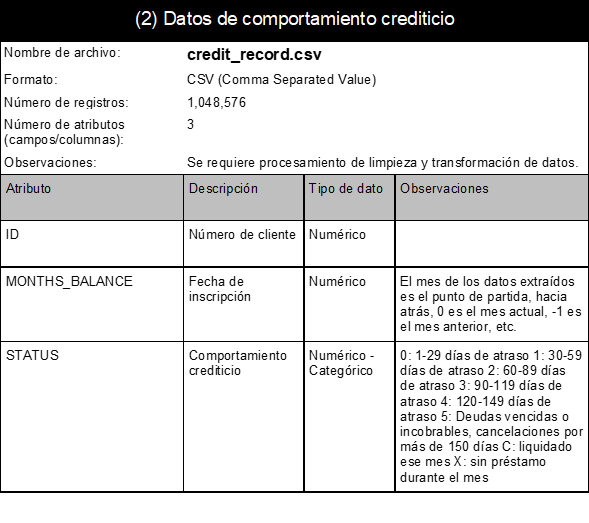

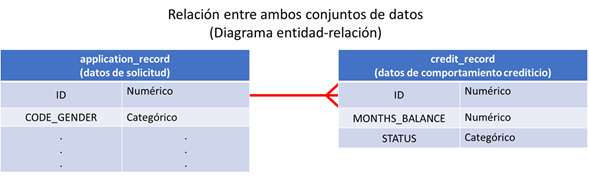

#Postwork 4 | Análisis Exploratorio de nuestro Dataset

In [ ]:
# Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [ ]:
with zipfile.ZipFile("datos.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

df_creditCard = pd.read_csv("targetdir/application_record.csv")
df_creditCard.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
# Reconocemos los tipos de datos de los atributos
df_creditCard.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

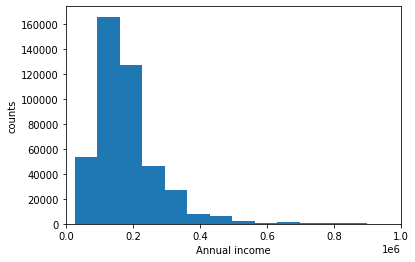

In [ ]:
# Graficamos el histograma de ingresos anuales con 50 contenedores
plt.hist(x= df_creditCard["AMT_INCOME_TOTAL"], bins = 100)
plt.xlabel("Annual income")
plt.ylabel("counts")
plt.xlim((0,1e6))
plt.title("Histograma de ingresos anuales de los clientes")
plt.show()

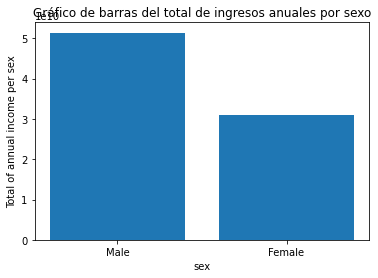

In [ ]:
# Graficamos un grafico de barras de la cantidad de clientes por sexo
plt.bar(["Male","Female"],df_creditCard.groupby("CODE_GENDER").sum()["AMT_INCOME_TOTAL"])
plt.xlabel("sex")
plt.ylabel("Total of annual income per sex")
plt.title("Gráfico de barras del total de ingresos anuales por sexo")
plt.show()

In [ ]:
# Estadisticas de cada columna
df_creditCard.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
# Describcion de los atributos
description = ["Client number","Gender","Is there a car","Is there a property",
               "Number of children","Annual income","Income category","Education level",
               "Marital status","Way of living","	Birthday","Start date of employment",
               "Is there a mobile phone","Is there a work phone","	Is there a phone",
               "Is there an email","Occupation","Family size"]
description_cols = pd.DataFrame({"Atributo":df_creditCard.columns,"Descripción":description})
description_cols

,Atributo,Descripción
0,ID,Client number
1,CODE_GENDER,Gender
2,FLAG_OWN_CAR,Is there a car
3,FLAG_OWN_REALTY,Is there a property
4,CNT_CHILDREN,Number of children
5,AMT_INCOME_TOTAL,Annual income
6,NAME_INCOME_TYPE,Income category
7,NAME_EDUCATION_TYPE,Education level
8,NAME_FAMILY_STATUS,Marital status
9,NAME_HOUSING_TYPE,Way of living


#Postwork 5 | Limpieza de datos y agregaciones

In [ ]:
# Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Primer Data Frame

Primero importamos los dataFrame y realizamos un head para vizualizar los datos que este contiene 

In [ ]:
# Leemos el conjunto de datos
df_credit_record = pd.read_csv("targetdir/credit_record.csv")
df_credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Verificamos que no exista un NaN en las filas, debido a la cantidad de filas no se despliegan todas

In [ ]:
#Lectura de NaN en las filas
df_credit_record.isna().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Length: 1048575, dtype: int64

Ahora revisamos las columnas

In [ ]:
#Leectura de NaN en las columnas
df_credit_record.isna().sum(axis=0)

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Como podemos observar el dataFrame "Credit_record" no tiene elementos NaN, entonces podemos guardar este archivo. 

In [ ]:
df_credit_record.to_csv('df_credit_record_clean.csv')

##Segundo data Frame

In [ ]:
df_application_record = pd.read_csv("targetdir/application_record.csv")
df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
#Leectura de NaN en las filas
df_application_record.isna().sum(axis=1)

0         1
1         1
2         0
3         0
4         0
         ..
438552    1
438553    0
438554    0
438555    1
438556    0
Length: 438557, dtype: int64

In [ ]:
#Leectura de NaN en las columnas
df_application_record.isna().sum(axis=0)

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Limpiamos la columna 'OCCUPATION_TYPE'

In [ ]:
df_application_record['OCCUPATION_TYPE'] = df_application_record['OCCUPATION_TYPE'].fillna('Unknown')
df_application_record.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

Verificamos NaN en las filas

In [ ]:
#Leectura de NaN en las columnas
df_application_record.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
438552    0
438553    0
438554    0
438555    0
438556    0
Length: 438557, dtype: int64

Guardamos este nuevo data Frame 

In [ ]:
df_application_record.to_csv('application_record_clean.csv')

#Postwork 6 | Automatización y APIs

In [ ]:
pip install twilio

     |████████████████████████████████| 488 kB 4.2 MB/s 
  Created wheel for twilio: filename=twilio-6.63.0-py2.py3-none-any.whl size=1290626 sha256=eb606809f7329685b1bd8182adddc735d8bfc7c12f486873a96791979e9154a7
  Stored in directory: /root/.cache/pip/wheels/bc/d2/c9/a003a2b396e276e7831e01bc62663a014df2a9d8537ac01ec8
Successfully built twilio


In [ ]:
#Importamos librerias
import requests
from twilio.rest import Client

Primero declaramos nuestro END point que es la direccion donde
realizamos un request a la api para obtener a los datos de esta, de igual manera establecemos nuestro acceso para una segunda API,

In [ ]:
OWM_Endpoint = "https://api.openweathermap.org/data/2.5/onecall"
api_key = "3f2cc0e4815b68c983b88676480ab516"
lat = 17.054230
lon = -96.713226
weater_params = {
    "lat": lat,
    "lon": lon,
    "appid": api_key,
    "exclude": "current,minutely,daily"
}
account_sid = "AC551ca6f3df1382f620b6106afe32db8c"
auth_token = "f1fb1d799f72330b7e2d57069de3293c"


In [ ]:
#Declaramos nuestra peticion a la API,
response = requests.get(OWM_Endpoint, params=weater_params)
#Verificamos que la respuesta de esta sea exitosa
response.raise_for_status()
#Guardamos la respuesta en una variable, pero primero
#convertimos la respuesta a formato Json
weather_data = response.json()
#print(whater_data['hourly'])
weather_slice = weather_data["hourly"][:12]

will_rain = False

In [ ]:
#Realizamos una comparacion de las probabilidades de lluvia
#este parametro es obtenido de la respuesta de la primera API
for hour_data in weather_slice:
    condition_code = hour_data["weather"][0]["id"]
    if int(condition_code) < 700:
        will_rain = True

#Si la probabilidad de lluvia es alta se realiza una peticion
#a la API de enviar un mensaje a el numero deseado
if will_rain:
    #Ingresamos las llaves requeridas por la API
    client = Client(account_sid, auth_token)
    #Ingresamos los datos requeridos en el cuerpo de la peticion.
    message = client.messages \
        .create(
        body ="Trae paraguas o te vas a mojar",
        from_='+17037942414',
        to ='+525522170058'
    )
    print(message.sid)

SM76e8037eeeef4040a4eb8836704c1b3d


Nota: El mensaje se envia a un solo numero debido a que es una version de prueba de la API.

# Postwork 7 | Transformación, filtración y ordenamiento de datos


In [ ]:
# Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Leemos el conjunto de datos df_credit_record_clean.csv

In [ ]:
df_credit_record = pd.read_csv("df_credit_record_clean.csv")

Leemos el conjunto de datos application_record_clean.csv  

In [ ]:
df_application_record = pd.read_csv("application_record_clean.csv")

Verificamos que los atributos  de df_credit_record tengan el tipo de dato correcto

In [ ]:
df_credit_record.dtypes

Unnamed: 0         int64
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

Los tipos de datos son correctos, recordemos que el atributo months balance es el mes de los datos extraídos es el punto de partida, hacia atrás, 0 es el mes actual, -1 es el mes anterior, etc. es decir, 0, -1, -2,...
y el status categoriza con:

0: 1-29 días de atraso 

1: 30-59 días de atraso 

2: 60-89 días de atraso 

3: 90-119 días de atraso 

4: 120-149 días de atraso 

5: Deudas vencidas o incobrables, cancelaciones por más de 150 días 

C: liquidado ese mes 

X: sin préstamo durante el mes 

es decir, este parametro contiene datos tipo int y string.

Verificamos que los atributos de df_credit_record tengan el tipo de dato correcto

In [ ]:
df_application_record.dtypes

Unnamed: 0               int64
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Los tipos de datos son correctos, a excepción de CNT_FAM_MEMBERS, al ser la cantidad de familiares, estos son tipo int y no float, asi que los pasamos de float a int.

In [ ]:
df_application_record['CNT_FAM_MEMBERS'].astype(int)

0         2
1         2
2         2
3         1
4         1
         ..
438552    1
438553    1
438554    1
438555    2
438556    2
Name: CNT_FAM_MEMBERS, Length: 438557, dtype: int64

Además, days of birth tiene la cantidad de dias de vida, por lo que es mas facil verlo como edad.
Pasamos de numero de dias viviendo a edad del cliente



In [ ]:
df_application_record.DAYS_BIRTH = round(df_application_record.DAYS_BIRTH/(-365),0)

Cambiamos nombre de la columna 'DAYS_BIRTH'a 'AGE' y eliminamos la columna 'Unnamed: 0'

In [ ]:
df_application_record = df_application_record.rename({'DAYS_BIRTH':'AGE'}, axis =1)
df_application_record = df_application_record.drop(['Unnamed: 0'], axis=1)

Borramos 'Unnamed: 0' del dataframe df_credit_record y ordenamos los datos por ID de dataframe df_credit_record.

In [ ]:
df_credit_record = df_credit_record.sort_values('ID', ascending=True)
df_credit_record = df_credit_record.drop(['Unnamed: 0'], axis=1)

### En base al historial crediticio de cada cliente, ¿cuáles son los más responsables en sus pagos?
Nos fijaremos en los clientes con status 0, C y X para determinar si son buenos clientes, es decir, si son responsables con sus pagos.

In [ ]:
c = df_credit_record['STATUS'].str.startswith('C')
x = df_credit_record['STATUS'].str.startswith('X')
cero = df_credit_record['STATUS'].str.startswith('0')
df_credit_filtro = df_credit_record[ cero | x | c]

#Ahora filtramos por ID para que no se repitan
clientes_optimos = df_credit_filtro.drop_duplicates(subset=['ID'])
clientes_optimos.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
22,5001712,-18,0
36,5001713,-13,X
54,5001714,-9,X
104,5001715,-44,X


El dataframe clientes_optimos contiene los clientes a los que podemos darles un crédito debido a su buen comportamiento crediticio.



### ¿Los clientes con mayor antiguedad suelen tener retrasos en sus pagos?

In [ ]:
# Filtramos por ID para que estos no se repitan y ordenamos months balance de menor a mayor.
antiguos = df_credit_filtro.drop_duplicates(subset=['ID'])
antiguos = antiguos.sort_values('MONTHS_BALANCE', ascending=True)
antiguos.head(10)

,ID,MONTHS_BALANCE,STATUS
614117,5079065,-60,0
328650,5033797,-60,X
551932,5066742,-60,X
926022,5126150,-60,0
619429,5085734,-60,0
292172,5026425,-60,0
587904,5068836,-60,0
840672,5117771,-60,0
965447,5137527,-60,0
127610,5010866,-60,0


Notamos que los clientes con mayor antiguedad suelen tener de 1-29 atrasos en sus pagos.

### ¿Quienes son los clientes con mayor mora? ¿Son clientes con antiguedad o clientes nuevos?
Veamos quienes son los clientes más morosos, es decir, los que tienen retrasos de más de dos meses y deudas incobrables. Así que filtramos los status 2, 3, 4 y 5.

In [ ]:
dos = df_credit_record['STATUS'].str.startswith('2')
tres = df_credit_record['STATUS'].str.startswith('3')
cuatro = df_credit_record['STATUS'].str.startswith('4')
cinco = df_credit_record['STATUS'].str.startswith('5')
morosos = df_credit_record[dos| tres | cuatro| cinco]

# Ahora filtramos por ID para que estos no se repitan y ordenamos status de mayor a menor 
morosos = morosos.drop_duplicates(subset=['ID'])
morosos = morosos.sort_values('STATUS', ascending=False)
morosos.head(10)

,ID,MONTHS_BALANCE,STATUS
615611,5079166,-24,5
580786,5068389,-21,5
814168,5116258,-21,5
336785,5036469,-18,5
814900,5116304,-31,5
814964,5116305,-37,5
339369,5036625,-8,5
245050,5022617,-41,5
832456,5117313,-37,5
609886,5078820,-20,5


Los clientes con mayor mora son relativamente clientes nuevos tomando en cuenta que los más antiguos tienen 58 meses siendo clientes.

Con este filtro tambien respondemos cuál es el mayor tiempo de morosidad.

### ¿Cuál es el periodo de tiempo promedio donde hay más cancelaciones?
Recordemos que en 'STATUS' la categoria 5 se refiere a las deudas vencidas o incobrables, cancelaciones por más de 150 días.

In [ ]:
# Filtramos los clientes con status 5
cancelaciones = df_credit_record[ cinco]

# Ahora filtramos por ID para que estos no se repitan y ordenamos status de mayor a menor 
cancelaciones = cancelaciones.drop_duplicates(subset=['ID'])
cancelaciones = cancelaciones.sort_values('STATUS', ascending=False)
cancelaciones['MONTHS_BALANCE'].mean()*-1

19.923076923076923

# Postwork 8 | Preparándose para las siguientes Fases

### Conclusiones y planes a futuro.

<p align = "justify"> Podemos concluir que una parte fundamental en la Ciencia de Datos es el preprocesamiento o limpieza de los datos con los cuales se va a trabajar, esto es porque aún cuando implementemos el mejor modelo para una predicción si utilizamos parámetros o datos erróneos o no representativos de nuestra muestra, los resultados que obtendremos serán inservibles e incluso, podrían ser contraproducentes. </p>

<p align = "justify"> Así, una vez que el procesamiento de los datos ha sido realizado de forma satisfactoria, haciendo uso de los diferentes algoritmos con los que podemos realizar un modelado, tenemos múltiples opciones para encontrar el modelo que mejor se ajuste a los resultados que queremos obtener que desde luego, están adaptados a nuestras necesidades. </p>

<p align = "justify"> Para eso, debemos ser capaces de tomar decisiones en cuanto a los resultados que deseamos obtener y se logran respondiendo preguntas como las siguientes: </p>

*   ¿Preferimos precisión sobre especificidad?
*   ¿Ganamos o perdemos cuando no aprobamos el crédito de clientes que sí pagarían buscando evitar a toda costa los clientes que dicen que pagarán pero no lo hacen (errores de Tipo 1 y 2)?
*   ¿En qué punto los clientes que pagarán el crédito nos ayudan a tener ganancias aún cuando hemos perdido debido a clientes han hecho fraude?
*   ¿Con qué intereses tendremos ganancias justas?
*   ¿En qué tiempo estimamos que los créditos deben ser cubiertos? 
*   ¿Qué modelo tiene una mayor confiabilidad?

<p align = "justify"> Graficar los datos proporcionados y obtenidos puede ayudarnos a entender mejor estas preguntas y contestarlas al utilizar herramientas que permitan una mejor visualización de todos los escenarios posibles. </p>

<p align = "justify"> Podemos intuir además que mientras mejor sea la información recolectada, estas preguntas y muchas más podrán responderse de una forma más rápida y con mayor confiabilidad donde por supuesto, la toma de desiciones será más adecuada y mejor para la institución financiera. </p>